In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-dataset/mri/pituitary_tumor/P_665_SP_.jpg
/kaggle/input/brain-mri-images-dataset/mri/pituitary_tumor/P_476_HF_.jpg
/kaggle/input/brain-mri-images-dataset/mri/pituitary_tumor/P_638_SP_.jpg
/kaggle/input/brain-mri-images-dataset/mri/pituitary_tumor/P_121_DA_.jpg
/kaggle/input/brain-mri-images-dataset/mri/pituitary_tumor/P_175_DA_.jpg
/kaggle/input/brain-mri-images-dataset/mri/pituitary_tumor/P_843_BR_.jpg
/kaggle/input/brain-mri-images-dataset/mri/pituitary_tumor/P_594_VF_.jpg
/kaggle/input/brain-mri-images-dataset/mri/pituitary_tumor/P_343.jpg
/kaggle/input/brain-mri-images-dataset/mri/pituitary_tumor/P_290_HF_.jpg
/kaggle/input/brain-mri-images-dataset/mri/pituitary_tumor/P_838_BR_.jpg
/kaggle/input/brain-mri-images-dataset/mri/pituitary_tumor/P_577_DA_.jpg
/kaggle/input/brain-mri-images-dataset/mri/pituitary_tumor/P_369_RO_.jpg
/kaggle/input/brain-mri-images-dataset/mri/pituitary_tumor/P_527_SP_.jpg
/kaggle/input/brain-mri-images-dataset/mri/pituitary_tu

### The work involves building and training a convolutional neural network (CNN) model for classifying brain MRI images into four categories: 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor', and 'normal'. The dataset is located at /kaggle/input/brain-mri-images-dataset/mri, with each image resized to 128x128 pixels and consisting of three color channels (RGB), resulting in an input shape of (21672, 128, 128, 3). The CNN architecture includes several convolutional layers followed by max-pooling and dropout for regularization, designed to identify patterns specific to each category. The model's performance is evaluated using metrics such as the ROC curve and confusion matrix, with training and validation accuracy and loss visualized across epochs. Data augmentation is used to enhance the model's ability to generalize, and the training history is plotted to track the model's progression during training.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow. keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [3]:
import os

# Path to the dataset subdirectory
dataset_subdir = '/kaggle/input/brain-mri-images-dataset/mri'

# subdirectories (categories) within the dataset
categories = [d for d in os.listdir(dataset_subdir) if os.path.isdir(os.path.join(dataset_subdir, d))]

# Count categories
num_categories = len(categories)

# Print categories and their count
print(f"Categories found: {categories}")
print(f"Number of categories: {num_categories}")


Categories found: ['pituitary_tumor', 'meningioma_tumor', 'glioma_tumor', 'normal']
Number of categories: 4


In [4]:
data_path='/kaggle/input/brain-mri-images-dataset/mri'
categories=['pituitary_tumor', 'meningioma_tumor', 'glioma_tumor', 'normal']

In [5]:
img_size=128
data=[]
labels=[]

In [6]:
for category in categories:
    folder=os.path.join(data_path,category)
    label=categories.index(category)
    for image_file in os.listdir(folder):
        try:
            image_path=os.path.join(folder,image_file)
            img=load_img(image_path,target_size=(img_size,img_size))
            image_array=image_array = img_to_array(img) / 255.0
            data.append(image_array)
            labels.append(label)
        except Exception as e:
            print(f'error in loading {image_file}:{e}')
        

In [7]:
data = np.array(data)
labels = np.array(labels)

In [8]:
data.shape

(21672, 128, 128, 3)

In [9]:
print(type(data), type(labels))  # Should output <class 'list'> <class 'list'>


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
# Split into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=len(categories))
y_val = to_categorical(y_val, num_classes=len(categories))
y_test = to_categorical(y_test, num_classes=len(categories))

In [11]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')  # Output layer
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=25,
    verbose=1
)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


475/475 ━━━━━━━━━━━━━━━━━━━━ 292s 606ms/step - accuracy: 0.4082 - loss: 1.2363 - val_accuracy: 0.5817 - val_loss: 0.9507
Epoch 2/25
475/475 ━━━━━━━━━━━━━━━━━━━━ 278s 584ms/step - accuracy: 0.5840 - loss: 0.9561 - val_accuracy: 0.6530 - val_loss: 0.8149
Epoch 3/25
475/475 ━━━━━━━━━━━━━━━━━━━━ 285s 597ms/step - accuracy: 0.6121 - loss: 0.8958 - val_accuracy: 0.5051 - val_loss: 1.0395
Epoch 4/25
475/475 ━━━━━━━━━━━━━━━━━━━━ 276s 578ms/step - accuracy: 0.6517 - loss: 0.8331 - val_accuracy: 0.6512 - val_loss: 0.8129
Epoch 5/25
475/475 ━━━━━━━━━━━━━━━━━━━━ 283s 593ms/step - accuracy: 0.6653 - loss: 0.7921 - val_accuracy: 0.7265 - val_loss: 0.6808
Epoch 6/25
475/475 ━━━━━━━━━━━━━━━━━━━━ 279s 586ms/step - accuracy: 0.6812 - loss: 0.7556 - val_accuracy: 0.7330 - val_loss: 0.6817
Epoch 7/25
475/475 ━━━━━━━━━━━━━━━━━━━━ 273s 573ms/step - accuracy: 0.7096 - loss: 0.7032 - val_accuracy: 0.7502 - val_loss: 0.6176
Epoch 8/25
475/475 ━━━━━━━━━━━━━━━━━━━━ 276s 579ms/step - accuracy: 0.7320 - loss: 0.66

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8813


In [16]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8813


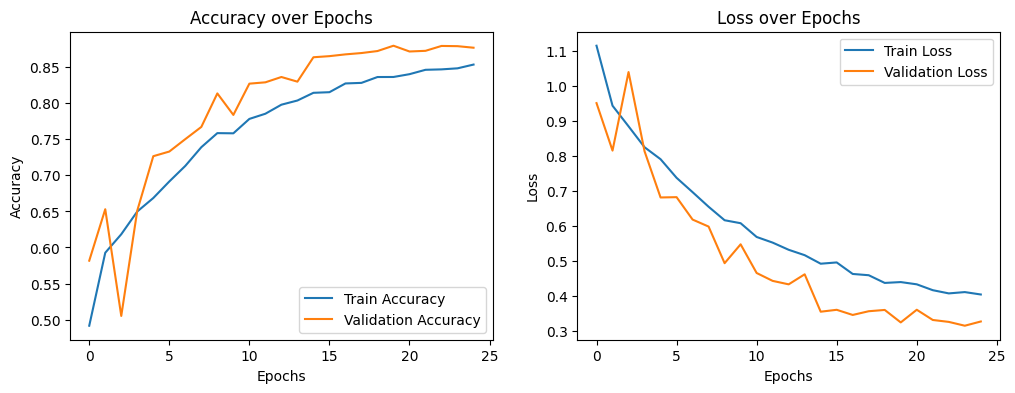

In [17]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

In [18]:
# Save model
model.save("tumor_classification_model.h5")

# Load model later
from tensorflow.keras.models import load_model
model = load_model("tumor_classification_model.h5")

In [19]:
# predictions using the trained model
predicted_images = model.predict(X_test)  # For models predicting reconstructed images


102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step


In [20]:
import numpy as np

predicted_labels = np.argmax(predicted_images, axis=1)  # Get class indices


In [21]:
import numpy as np
import matplotlib.pyplot as plt

#  labels for the test set
predicted_labels = model.predict(X_test)

# predicted class for each image
predicted_class = np.argmax(predicted_labels, axis=1)

#  one-hot encoded y_test to class labels for comparison
true_class = np.argmax(y_test, axis=1)

102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step


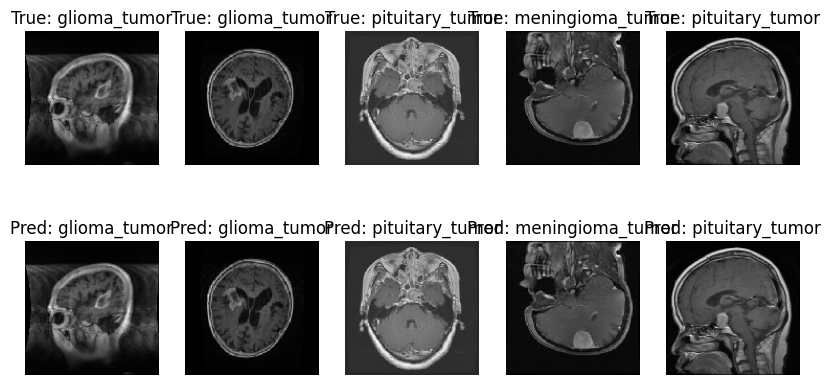

In [22]:
# Plot the original and predicted images side by side
plt.figure(figsize=(10, 5))

#  select an index to visualize a specific image
for i in range(5):  # Display the first 5 test images
    plt.subplot(2, 5, i+1)  # First row for original images
    plt.imshow(X_test[i])  # Show the original image
    plt.title(f'True: {categories[true_class[i]]}')
    plt.axis('off')

    plt.subplot(2, 5, i+6)  # Second row for predicted images
    plt.imshow(X_test[i])  # Show the predicted image
    plt.title(f'Pred: {categories[predicted_class[i]]}')
    plt.axis('off')

plt.show()

In [23]:
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('predicted_vs_original.png')

<Figure size 640x480 with 0 Axes>

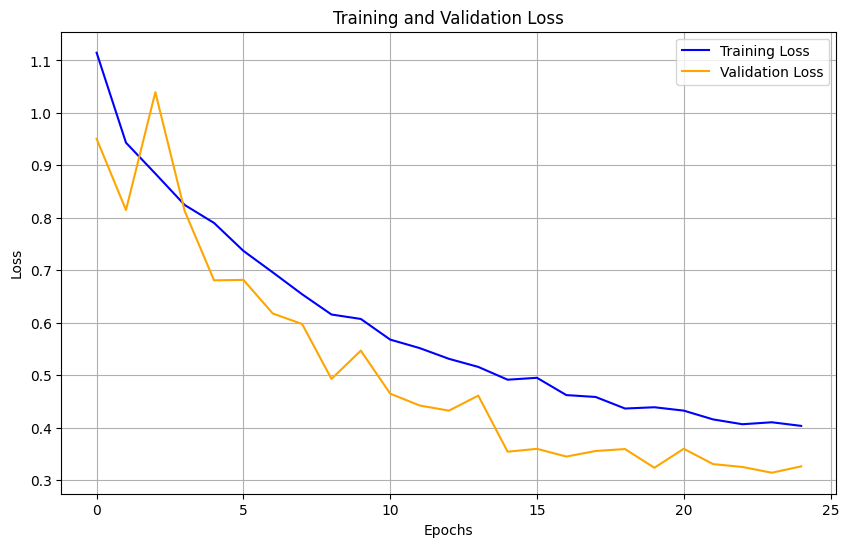

In [24]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 139ms/step


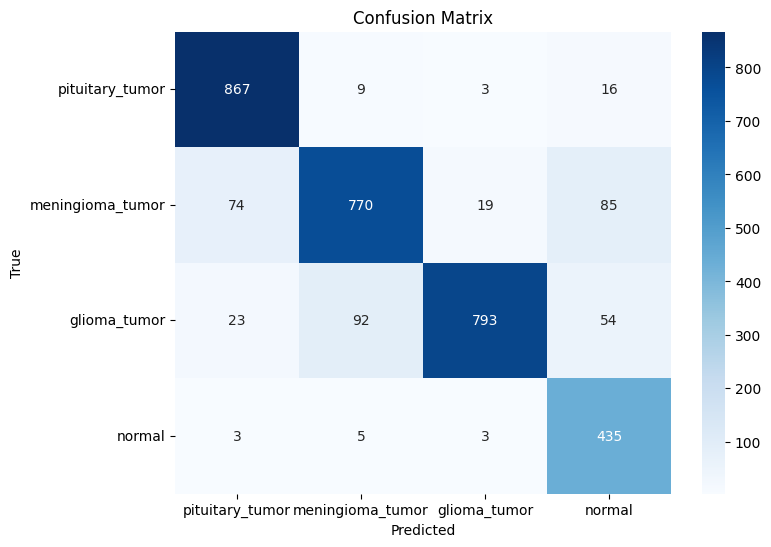

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert the probabilities to class labels

# true labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels to class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 132ms/step


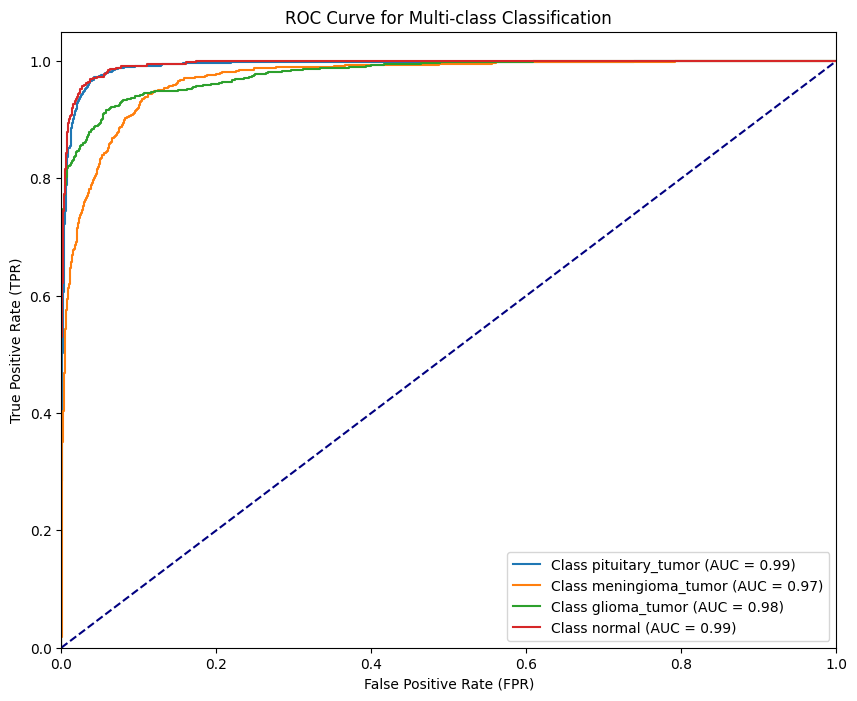

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

# labels to binary format (one-hot encoding)
y_true_bin = label_binarize(y_true, classes=np.arange(len(categories)))

# predicted probabilities for each class
y_pred_prob = model.predict(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC AUC for each class
for i in range(len(categories)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {categories[i]} (AUC = {roc_auc:.2f})')

# Plot of diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc='lower right')

plt.show()

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,158 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

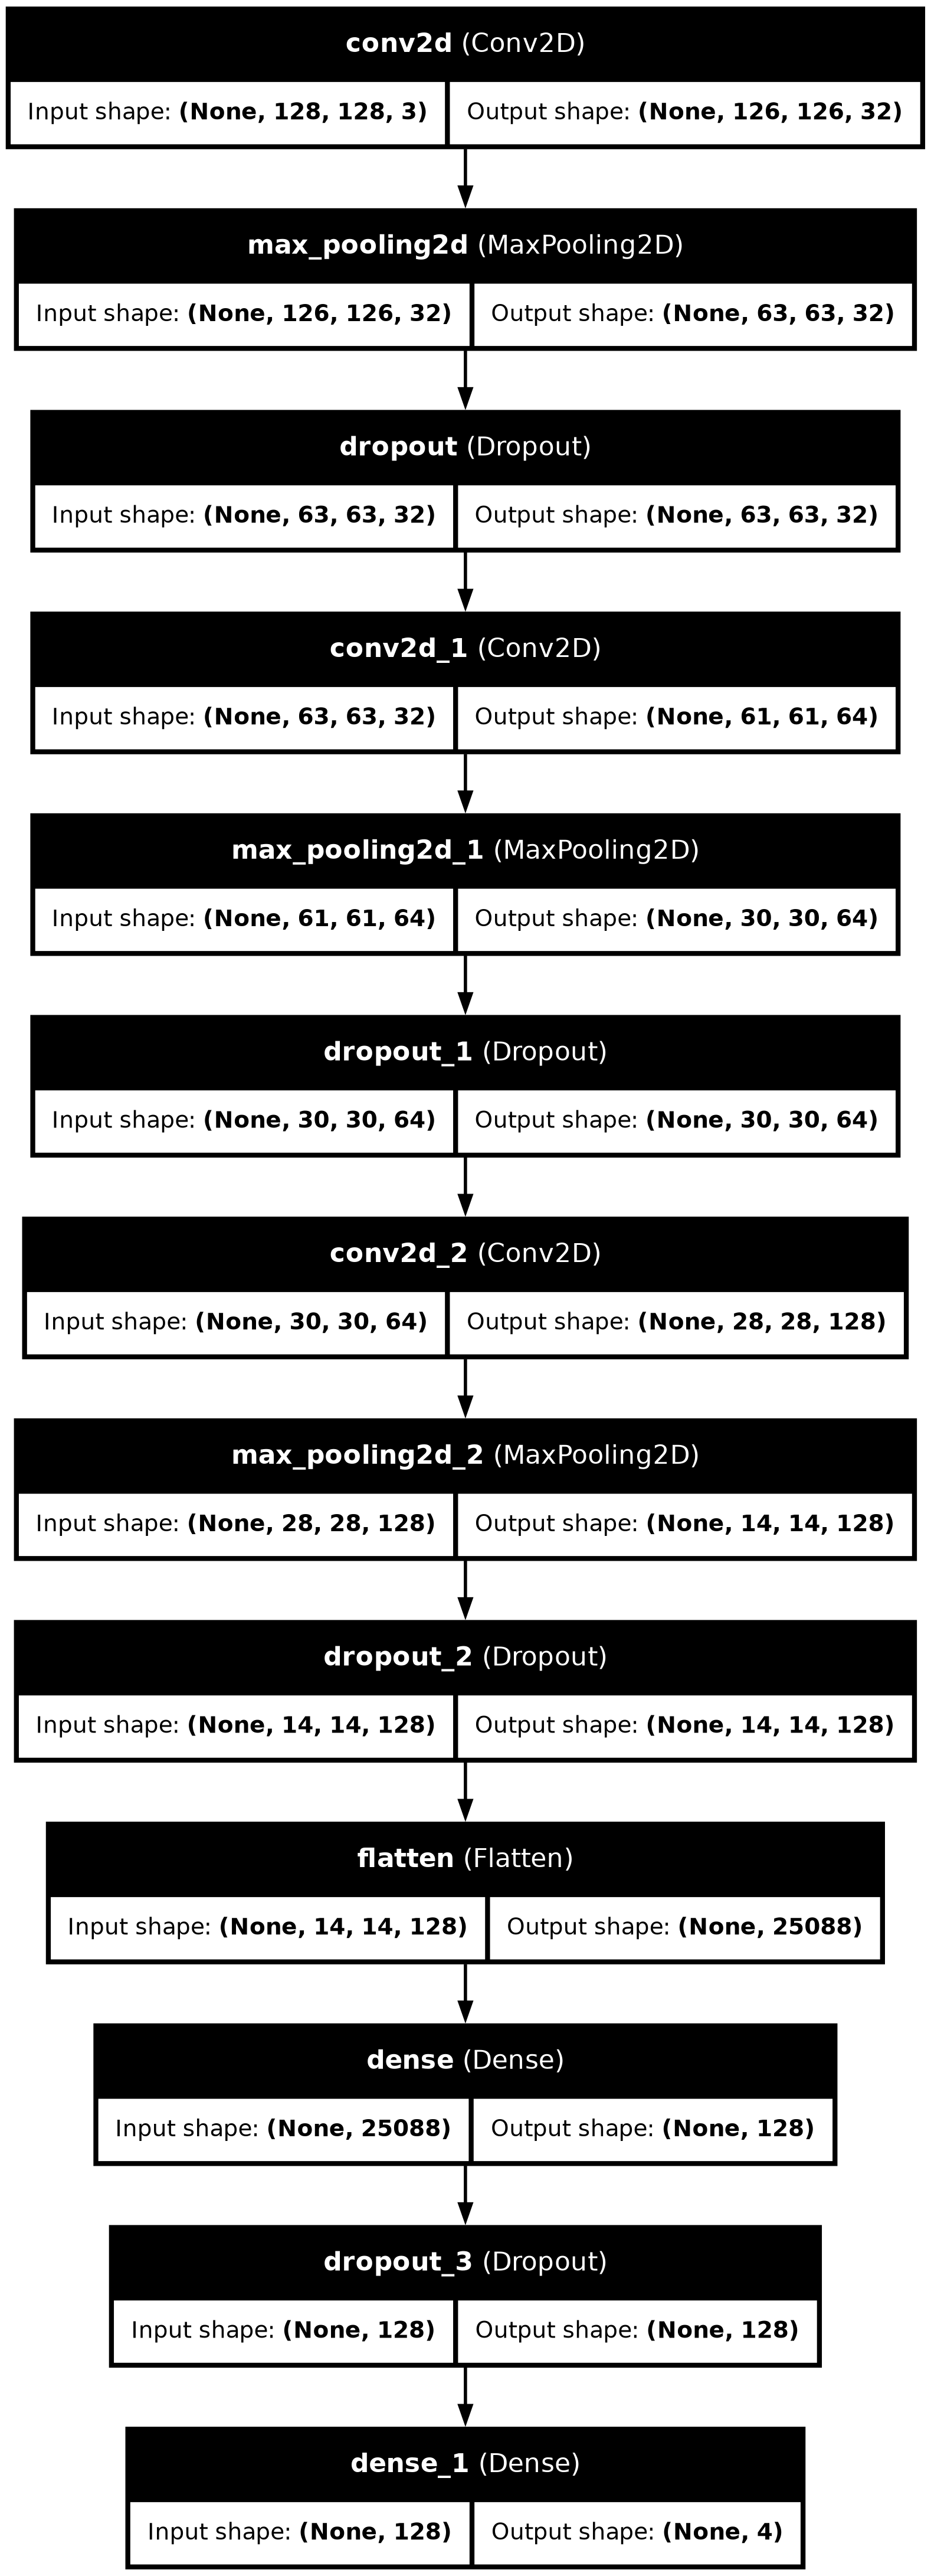

In [28]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture and save it as an image
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


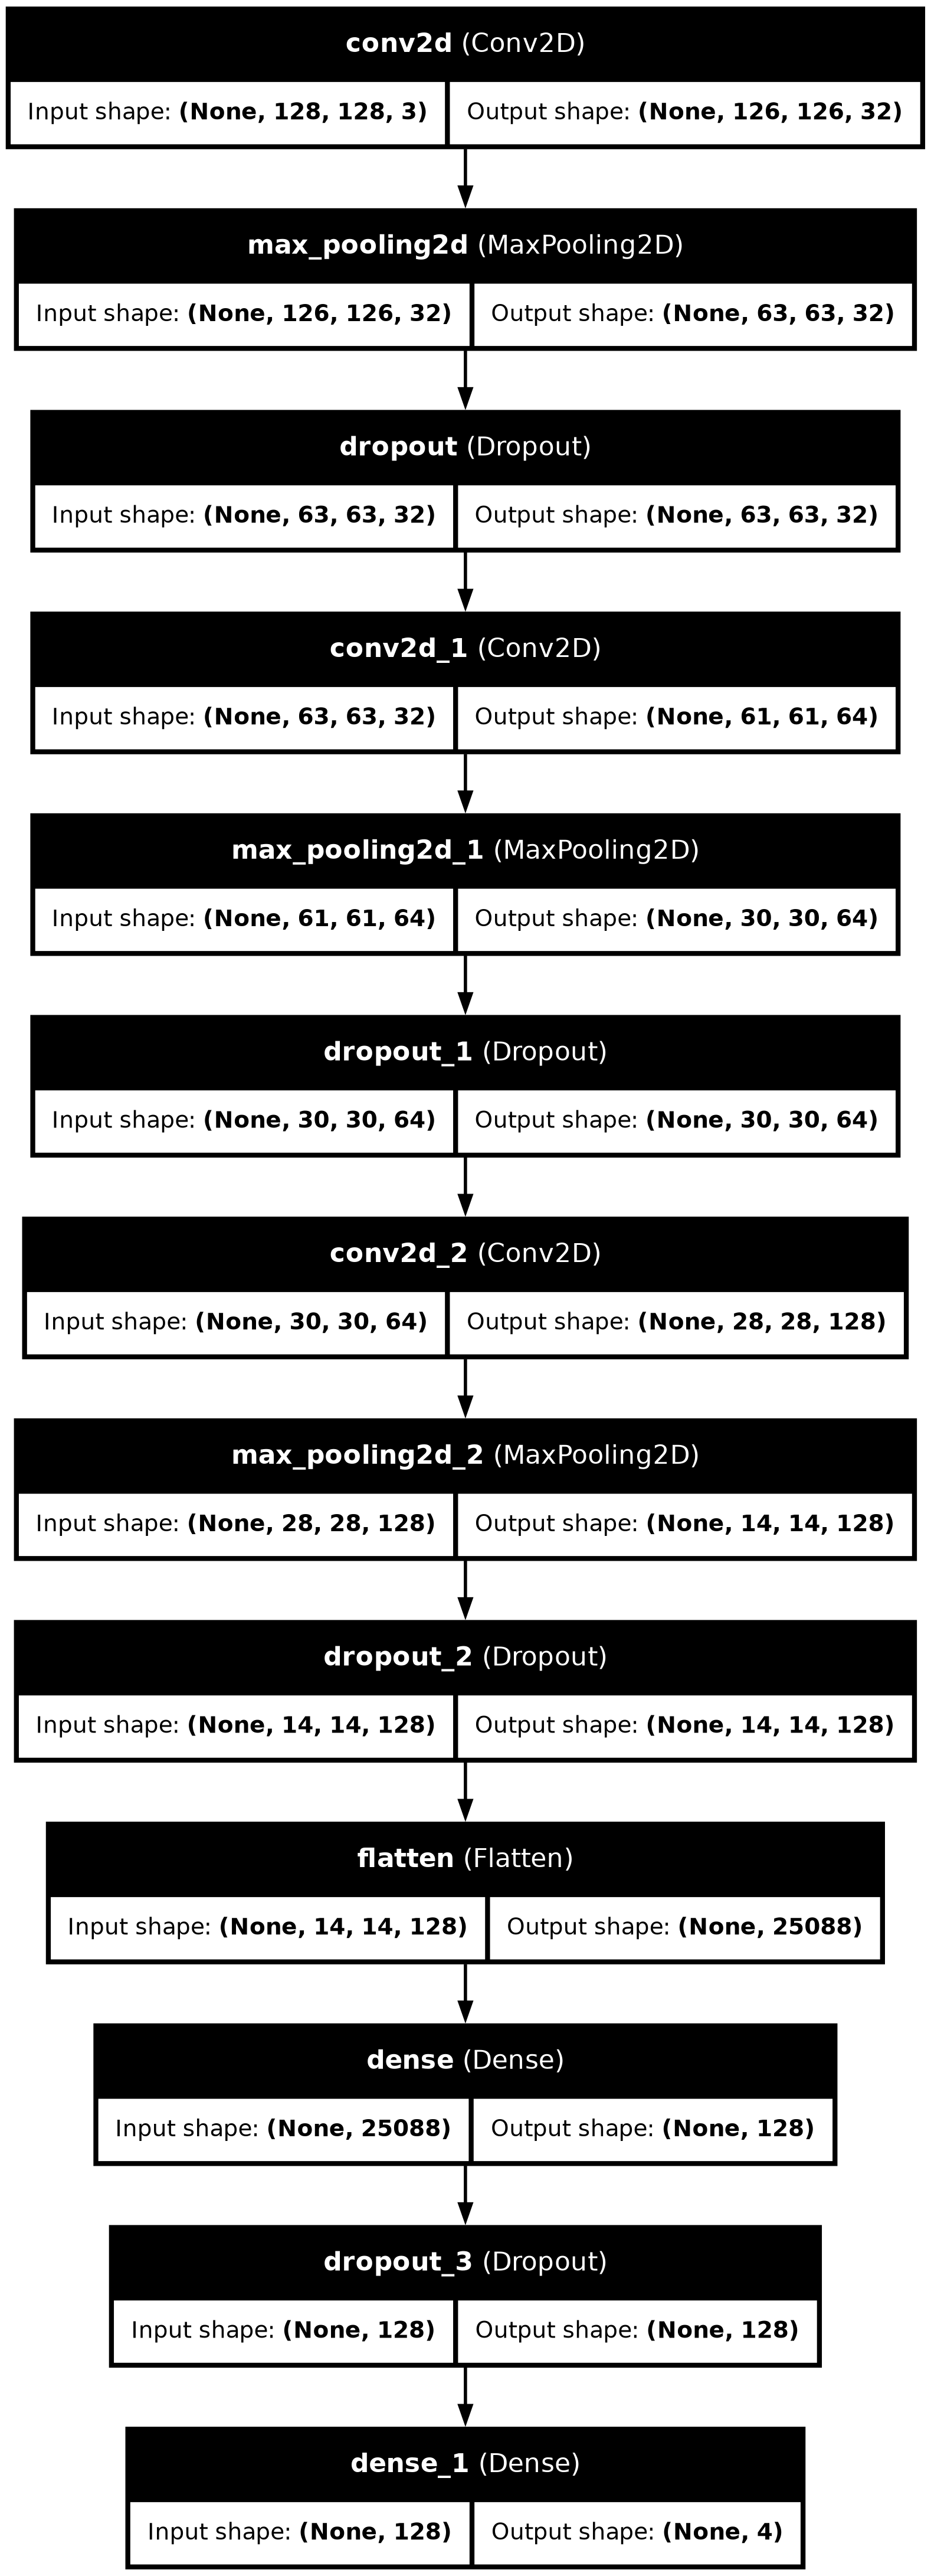

In [29]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture and save it as an image
plot_model(model, 
           to_file='model_architecture.png',  # Save the diagram as a PNG file
           show_shapes=True,                  # Show layer shapes
           show_layer_names=True,             # Show layer names
           rankdir='TB'                       # Rank the layers from top to bottom (default is left to right)
)

In [30]:
batch = next(datagen.flow(X_train, y_train, batch_size=32))
print("Batch X shape:", batch[0].shape)  # The image data shape (batch_size, img_height, img_width, channels)
print("Batch y shape:", batch[1].shape)  # The label data shape (batch_size, num_classes)


Batch X shape: (32, 128, 128, 3)
Batch y shape: (32, 4)


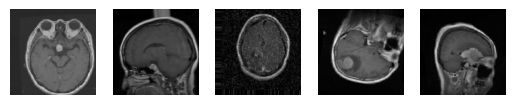

In [31]:
import numpy as np

# Display a few augmented images from the generator
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=32):
    for i in range(5):  # Show 5 images
        plt.subplot(1, 5, i+1)
        plt.imshow(X_batch[i])
        plt.axis('off')
    plt.show()
    break  # Break after one batch